## Simulate the bias-variance trade-off using polynomial regression on synthetic data and explore the impact of high-dimensional feature spaces on model performance using PCA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

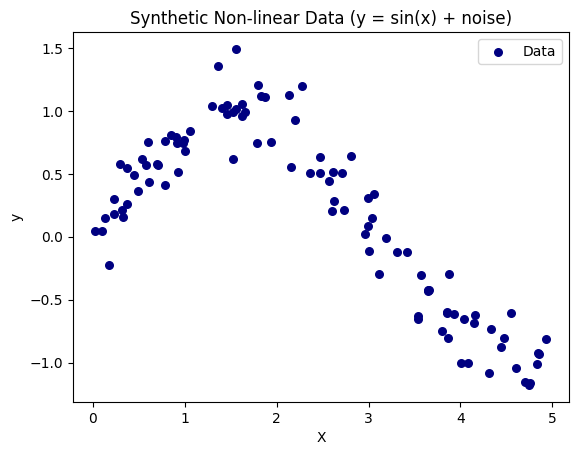

In [2]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

plt.scatter(X, y, color='navy', s=30, label='Data')
plt.title("Synthetic Non-linear Data (y = sin(x) + noise)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

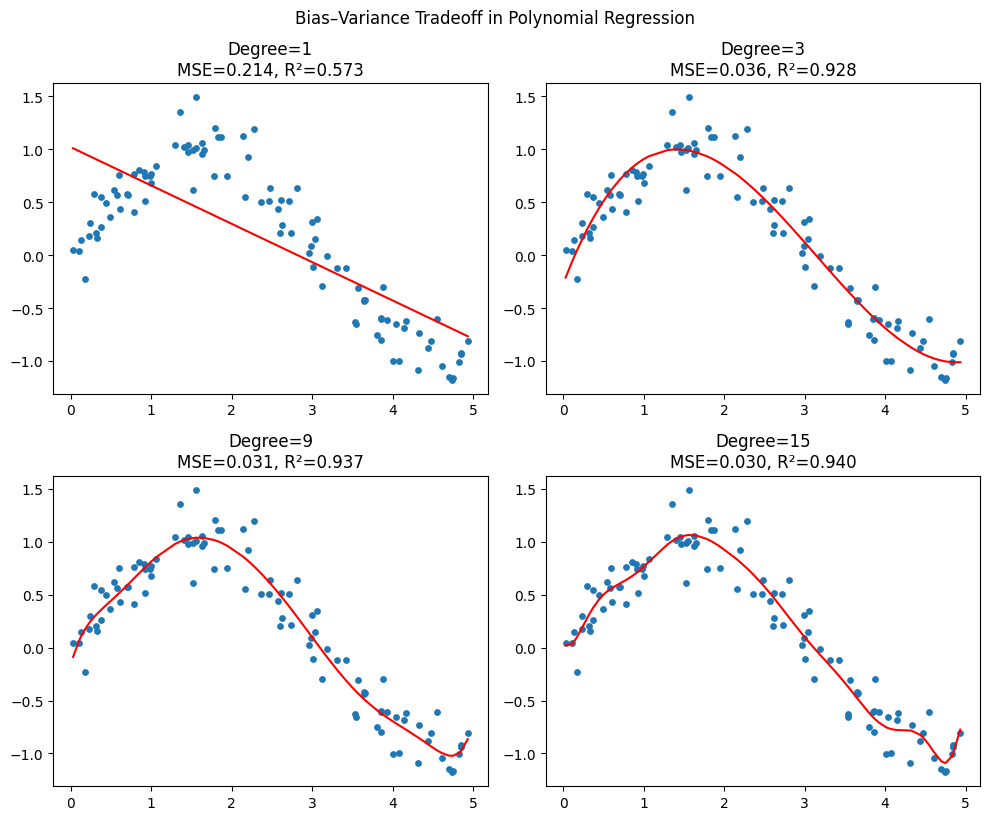

In [3]:
degrees = [1, 3, 9, 15]
plt.figure(figsize=(10, 8))

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    plt.subplot(2, 2, i)
    plt.scatter(X, y, s=15)
    plt.plot(X, y_pred, color='r')
    plt.title(f"Degree={degree}\nMSE={mse:.3f}, R²={r2:.3f}")
    plt.tight_layout()

plt.suptitle("Bias–Variance Tradeoff in Polynomial Regression", y=1.02)
plt.show()

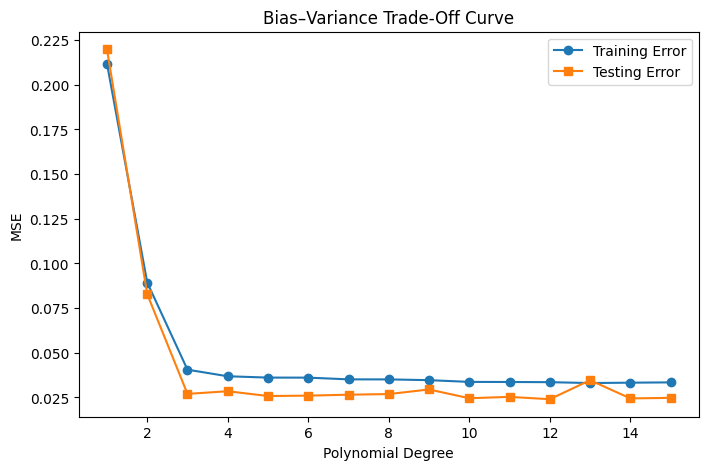

In [4]:
train_err, test_err = [], []
degrees = range(1, 16)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for d in degrees:
    poly = PolynomialFeatures(d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_err.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    test_err.append(mean_squared_error(y_test, model.predict(X_test_poly)))

plt.figure(figsize=(8,5))
plt.plot(degrees, train_err, label='Training Error', marker='o')
plt.plot(degrees, test_err, label='Testing Error', marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Bias–Variance Trade-Off Curve")
plt.legend()
plt.show()

In [5]:
np.random.seed(42)
X_hd = np.random.randn(500, 50)  # 50 features
true_weights = np.random.randn(50)
y_hd = X_hd @ true_weights + np.random.randn(500) * 0.5  # linear relation + noise

# Split
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X_hd, y_hd, test_size=0.3, random_state=42)

# Model without PCA
model_hd = LinearRegression()
model_hd.fit(X_train_hd, y_train_hd)
y_pred_hd = model_hd.predict(X_test_hd)
mse_hd = mean_squared_error(y_test_hd, y_pred_hd)


High-Dimensional Model (50 features): MSE = 0.286
After PCA (10 components): MSE = 23.769
Variance retained by PCA: 31.14%


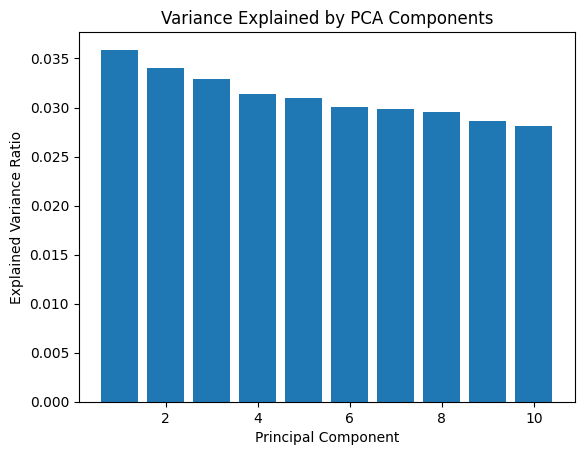

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_hd)
X_test_scaled = scaler.transform(X_test_hd)

pca = PCA(n_components=10)  # reduce from 50 → 10
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_hd)
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_hd, y_pred_pca)

print(f"\nHigh-Dimensional Model (50 features): MSE = {mse_hd:.3f}")
print(f"After PCA (10 components): MSE = {mse_pca:.3f}")
print(f"Variance retained by PCA: {np.sum(pca.explained_variance_ratio_):.2%}")

plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.title("Variance Explained by PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()